In [1]:
#IMPORTANDO BIBLIOTECAS
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/JusciAvelino/Monitoria-ModelagemPreditivaDescritiva1/main/Breast%20Cancer%20Wisconsin%20(Diagnostic).csv')

In [3]:
X = dataset.drop([dataset.columns[0]], axis = 1)
y = dataset[dataset.columns[0]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

**MÉTRICAS**

In [4]:
model = DecisionTreeClassifier(random_state=199)
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.95      0.87      0.91        94
           M       0.79      0.92      0.85        49

    accuracy                           0.89       143
   macro avg       0.87      0.90      0.88       143
weighted avg       0.90      0.89      0.89       143



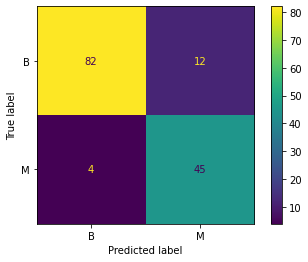

In [5]:
plot_confusion_matrix(model, X_test, y_test)

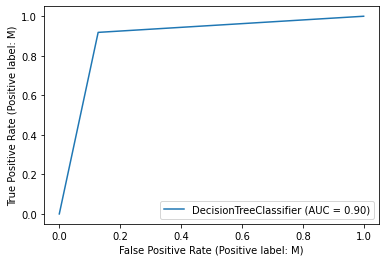

In [6]:
plot_roc_curve(model, X_test, y_test)

**HOLD-OUT**

In [7]:
def test_model(X_train, X_test, y_train, y_test, model_class=DecisionTreeClassifier):
    model = model_class(random_state=199)
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)
    return accuracy
    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=199)
print(test_model(X_train, X_test, y_train, y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=200)
print(test_model(X_train, X_test, y_train, y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=201)
print(test_model(X_train, X_test, y_train, y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=202)
print(test_model(X_train, X_test, y_train, y_test))

#Aleatório
print("\nAleatório")
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(test_model(X_train, X_test, y_train, y_test))

0.916083916083916
0.9370629370629371
0.9370629370629371
0.9440559440559441

Aleatório
0.9370629370629371


In [8]:
def hold_out():
  accuracies_list = []
  for i in range(0, 30):
      X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=199+i) #variando o random state para criar amostras diferentes
      accuracies_list.append(test_model(X_train, X_test, y_train, y_test))

  accuracies = np.array(accuracies_list)
  print("Min: %.3f Max: %.3f" %(accuracies.min(), accuracies.max()))
  print("Hold-out: %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))

hold_out()

Min: 0.888 Max: 0.951
Hold-out: 0.921 +- (0.021)


**LEAVE-ONE-OUT**

In [9]:
def loo(loo):
    y_true, y_pred = list(), list()
    for train_index, test_index in loo.split(X):
          X_train, X_test = X.iloc[train_index], X.iloc[test_index]
          y_train, y_test = y.iloc[train_index], y.iloc[test_index]
          model = DecisionTreeClassifier(random_state=199)
          model.fit(X_train, y_train)
          pred = model.predict(X_test)
          y_true.append(y_test)
          y_pred.append(pred[0])
          
    print("Leave-One-Out: %.3f" %(accuracy_score(y_true, y_pred)))
loo(LeaveOneOut())

Leave-One-Out: 0.924


**KFOLD**

In [10]:
def evaluate_model(kf):
    accuracies_list = []
    fold = 0
    for train, test in kf.split(X, y):
        
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        model = DecisionTreeClassifier(random_state=199)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print("Fold %d: %.3f" %(fold, accuracy_score(y_test, y_pred)))
        
        accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1

    accuracies = np.array(accuracies_list)
    print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))

evaluate_model(KFold(n_splits=5, random_state=42, shuffle=True))

Fold 0: 0.947
Fold 1: 0.930
Fold 2: 0.895
Fold 3: 0.947
Fold 4: 0.947

Acurácia média (desvio): 0.933 +- (0.020)


**GRID SEARCH CV**

In [11]:
def grid_Search(skf):
  accuracies_list = []
  fold = 0

  for train, test in skf.split(X, y):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        model = DecisionTreeClassifier(random_state=199)
        parameters = {'min_samples_split': [10, 30],
                        'max_depth':[5, 30],
                        'max_features':[10, 30]
                        }
    
        grid = GridSearchCV(estimator = model,             # É o DecisionTree
                    param_grid = parameters,           # É aquele dicionário com valores para serem testados.
                    scoring = 'accuracy',              # A métrica de avaliação
                    cv = 5)
        
        grid.fit(X_train, y_train)

        y_pred = grid.predict(X_test)
    
        print("Melhor parametro:", grid.best_params_)         
        print("Fold %d: %.3f" %(fold, accuracy_score(y_test, y_pred)))
        
        accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1
    
    
  accuracies = np.array(accuracies_list)
  print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))
  return pd.DataFrame(grid.cv_results_)

grid_Search(StratifiedKFold(n_splits=5, random_state=42, shuffle=True))

Melhor parametro: {'max_depth': 30, 'max_features': 10, 'min_samples_split': 10}
Fold 0: 0.921
Melhor parametro: {'max_depth': 5, 'max_features': 10, 'min_samples_split': 10}
Fold 1: 0.912
Melhor parametro: {'max_depth': 5, 'max_features': 10, 'min_samples_split': 30}
Fold 2: 0.921
Melhor parametro: {'max_depth': 30, 'max_features': 10, 'min_samples_split': 10}
Fold 3: 0.939
Melhor parametro: {'max_depth': 5, 'max_features': 30, 'min_samples_split': 10}
Fold 4: 0.938

Acurácia média (desvio): 0.926 +- (0.010)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007728,0.001025,0.003412,0.000197,5,10,10,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.923913,0.890110,0.868132,0.923077,0.967033,0.914453,0.033665,4
1,0.006960,0.000370,0.003465,0.000321,5,10,30,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.902174,0.879121,0.901099,0.923077,0.967033,0.914501,0.029720,3
2,0.017233,0.008064,0.006208,0.003164,5,30,10,"{'max_depth': 5, 'max_features': 30, 'min_samp...",0.923913,0.901099,0.956044,0.945055,0.912088,0.927640,0.020348,1
3,0.022037,0.005095,0.007066,0.003150,5,30,30,"{'max_depth': 5, 'max_features': 30, 'min_samp...",0.891304,0.901099,0.901099,0.945055,0.923077,0.912327,0.019395,5
4,0.014862,0.001043,0.003978,0.000679,30,10,10,"{'max_depth': 30, 'max_features': 10, 'min_sam...",0.869565,0.890110,0.901099,0.923077,0.956044,0.907979,0.029599,7
5,0.007575,0.000303,0.003613,0.000454,30,10,30,"{'max_depth': 30, 'max_features': 10, 'min_sam...",0.923913,0.868132,0.868132,0.901099,0.967033,0.905662,0.037249,8
6,0.011956,0.001329,0.005369,0.002684,30,30,10,"{'max_depth': 30, 'max_features': 30, 'min_sam...",0.913043,0.901099,0.956044,0.923077,0.912088,0.921070,0.018821,2
7,0.011459,0.001214,0.003747,0.000117,30,30,30,"{'max_depth': 30, 'max_features': 30, 'min_sam...",0.891304,0.901099,0.901099,0.945055,0.923077,0.912327,0.019395,5
